Note: this notebook is meant to be a demo of some of the capabilities of **`oo-learning`** (https://github.com/shane-kercheval/oo-learning); it is not meant to show the best approach to exploring/cleaning/modeling this particular dataset. Also, with most graphs (e.g. correlations/box-plots/etc.) I will spend very little time commenting on the significance of any interesting or patterns. Again, the intent is to show a demo, not a guide to data analysis. 

# Set Up Environment

In [1]:
# !pip install oolearning --upgrade

In [2]:
from oolearning import *
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
width = 10
plt.rcParams['figure.figsize'] = [width, width/1.333]

# Import Data

**`ExploreRegressionDataset`** is a class that gives convenience while exploring a new (regression) dataset by providing common functionality frequently needed during standard exploration.

Below, the class is initialized from a csv file (but you can also initialize from an existing pandas DataFarme using the constructor, **`ExploreRegressionDataset(dataset, target_variable)`**.

In [3]:
csv_file = '../data/insurance.csv'
target_variable = 'expenses'

explore = ExploreRegressionDataset.from_csv(csv_file_path=csv_file,
                                                target_variable=target_variable)

# Getting a General Understanding of the Data

In [4]:
explore.dataset.head()  # we can access the data directly by `.dataset`

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Let's explore the numeric columns.

In [5]:
explore.numeric_summary()

,count,nulls,perc_nulls,num_zeros,perc_zeros,mean,st_dev,coef of var,skewness,kurtosis,min,10%,25%,50%,75%,90%,max
age,1338,0,0.0,0,0.000,39.207,14.050,0.358,0.056,-1.245,18.00,19.000,27.000,39.00,51.000,59.000,64.00
bmi,1338,0,0.0,0,0.000,30.665,6.098,0.199,0.285,-0.053,16.00,23.000,26.300,30.40,34.700,38.630,53.10
children,1338,0,0.0,574,0.429,1.095,1.205,1.101,0.938,0.202,0.00,0.000,0.000,1.00,2.000,3.000,5.00
expenses,1338,0,0.0,0,0.000,13270.422,12110.011,0.913,1.516,1.606,1121.87,2346.535,4740.288,9382.03,16639.915,34831.716,63770.43


Now let's explore the categoric columns.

In [6]:
explore.categoric_summary()

,count,nulls,perc_nulls,top,unique,perc_unique
sex,1338,0,0.0,male,2,0.001
smoker,1338,0,0.0,no,2,0.001
region,1338,0,0.0,southeast,4,0.003


# Diving In

## Numeric Features

Let's dive in a little more into the characteristics of our numeric features.

### Correlations

A good place to start is with an overall idea of how correlated our numeric features are.

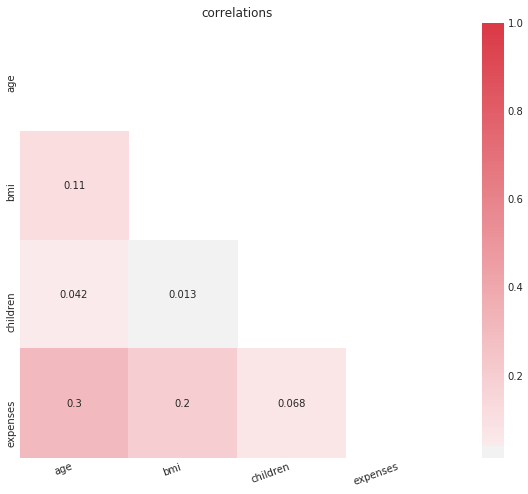

In [7]:
explore.plot_correlation_heatmap()

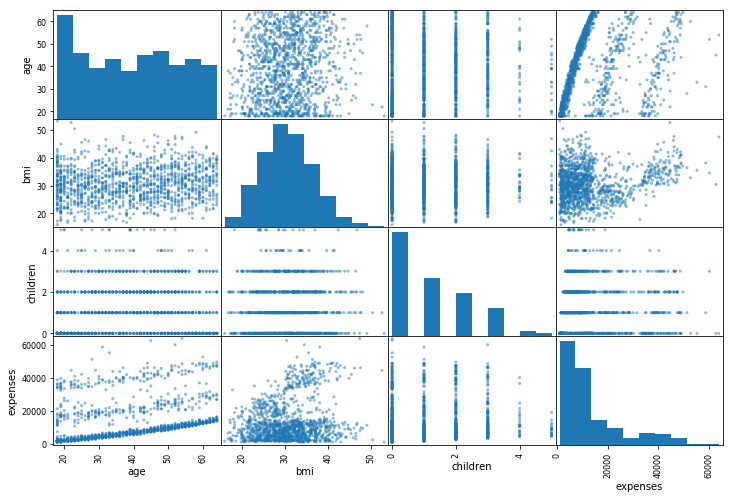

In [8]:
explore.plot_scatterplot_numerics()

### Features

Now let's take a look at each numeric feature, by itself, as well as how it relates to our target variable.

#### Age

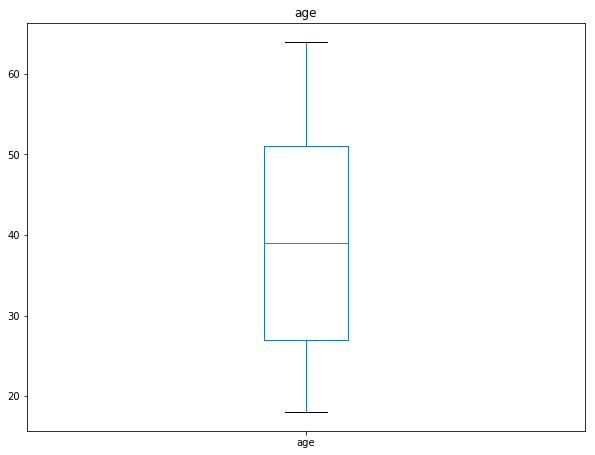

In [9]:
explore.plot_boxplot(numeric_feature='age')

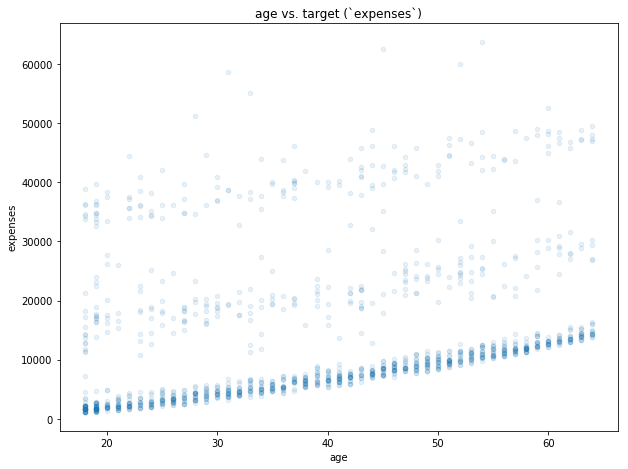

In [10]:
explore.plot_against_target(feature='age')

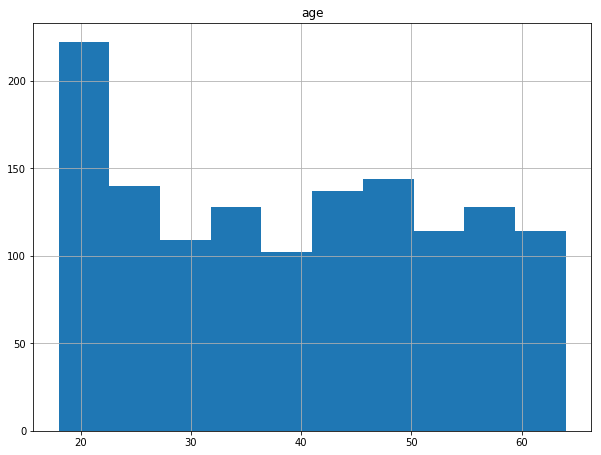

In [11]:
explore.plot_histogram(numeric_feature='age')

Above, we saw there was a slight negative correlation of **`children`** and  **`bmi`**, let's look at a scatter plot to see if it shows anything useful.

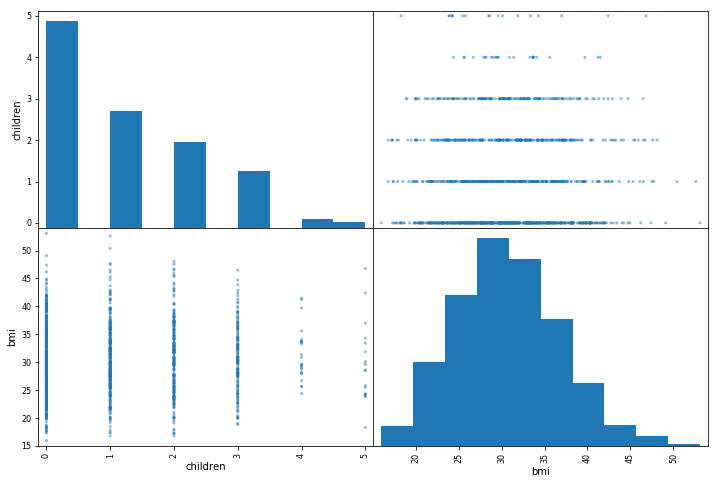

In [12]:
explore.plot_scatterplot_numerics(numeric_columns=['children', 'bmi'])

## Categoric Features

Let's dive in a little more into the characteristics of our categoric features.

#### smoker

We can see the unique values (and correspond frequencies) for a given feature via **`.unique_values()`**:

In [13]:
explore.unique_values(categoric_feature='smoker')

,freq,perc
no,1064,0.795
yes,274,0.205


Or we can visualize it via **`.plot_unique_values()`**:

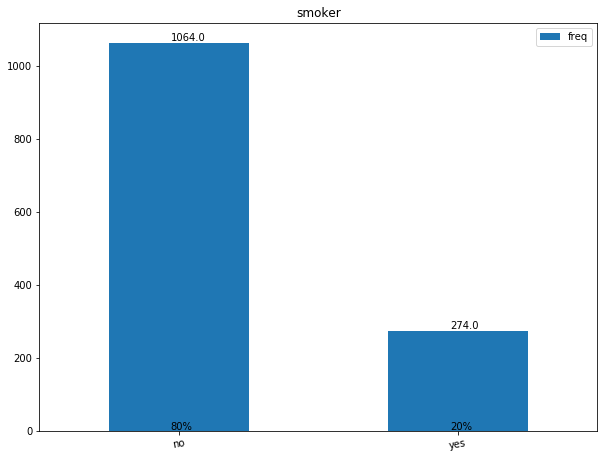

In [14]:
explore.plot_unique_values(categoric_feature='smoker')

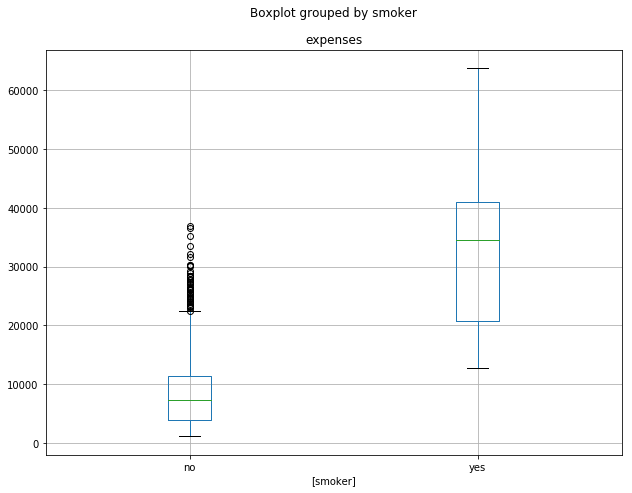

In [15]:
explore.plot_against_target(feature='smoker')

#### region

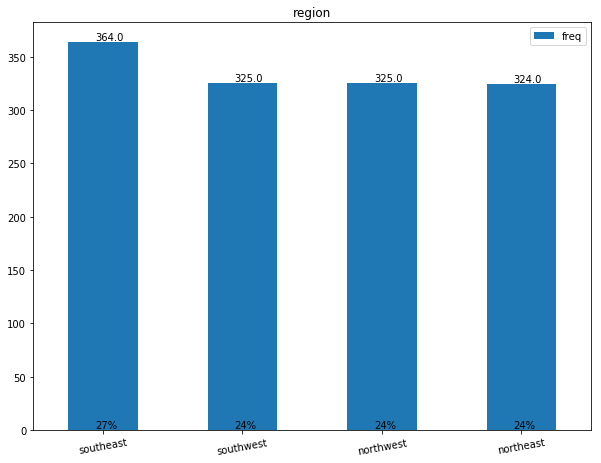

In [16]:
explore.plot_unique_values(categoric_feature='region')

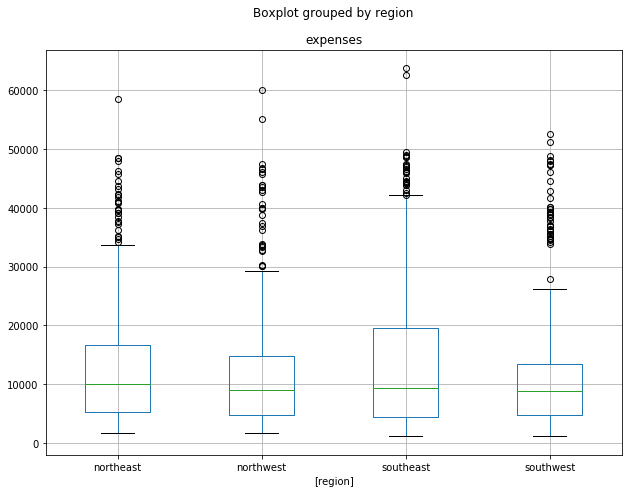

In [17]:
explore.plot_against_target(feature='region')